In [1]:
#S07 T01: Tasca del test d'hipòtesis

In [2]:
#Nivell 1

In [3]:
#Exercici 1
#Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. 
#Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

#Llibreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import warnings
import statistics

#Prenem el conjunt de dades de tema esportiu de la pàgina web 
#https://www.kaggle.com/abecklas/fifa-world-cup/version/5

#Dataset FIFA World Cup
#Fitxer: Python/WorldCupPlayers.csv
#Fitxer: Python/WorldCups.csv
#Fitxer: Python/WorldCupMatches.csv

wcupplay_df = pd.read_csv('Python/WorldCupPlayers.csv', engine="python", error_bad_lines=False, warn_bad_lines=False, sep=',')
wcup_df = pd.read_csv('Python/WorldCups.csv', engine="python", error_bad_lines=False, warn_bad_lines=False, sep=',')
wcupmatch_df = pd.read_csv('Python/WorldCupMatches.csv', engine="python", error_bad_lines=False, warn_bad_lines=False, sep=',')


In [171]:
wcup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     int32 
dtypes: int32(1), int64(4), object(5)
memory usage: 1.6+ KB


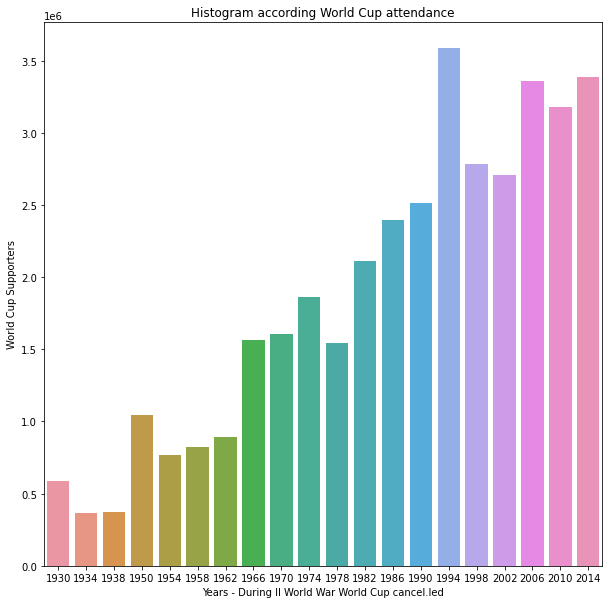

In [32]:
##1. World Cup - grafic sobre assistència.
fig = plt.figure(figsize=(10,10))

wcup_df['Attendance'] = wcup_df['Attendance'].astype(str).str.replace('.','').astype(int) 
wcup_df['Attendance'].dropna() #Esborrem els valors Nan

sns.barplot(data=wcup_df, x="Year", y="Attendance") 
plt.xlabel("Years - During II World War World Cup cancel.led")
plt.ylabel("World Cup Supporters")
plt.title("Histogram according World Cup attendance")
plt.show()

In [33]:
#Test d'Hipotesi: La mitjana d'assistència a totes les World Cup és superior a 1 mil.lió de persones.

In [34]:
#Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 
#p-valor: nivell de significació observat   
#alpha: nivell de significació d'error
from scipy.stats import ttest_1samp

alpha = 0.05 
#Utilitzem la funció estadistica ttest_1samp.
#Calculant p-value.
tstatistic, pvalue = ttest_1samp(wcup_df['Attendance'], popmean= 1000000)

print('T-statistic:', tstatistic)
print('P-value:', round(pvalue, 10))

#P-value: 0.0 té tendencia a valor 0 i és menor a 0.05. Es rebutja la hipòtesi nul·la.
if (pvalue < alpha):
    print('Es rebutja la hipòtesi nul·la')    
else:
      print('Hipòtesi nul·la acceptada') 

T-statistic: 3.6419994773355358
P-value: 0.0017344497
Es rebutja la hipòtesi nul·la


In [35]:
print(f'Assistència mitjana és: {wcup_df.Attendance.mean():.0f} persones')

Assistència mitjana és: 1872882 persones


In [36]:
#Nivell 2

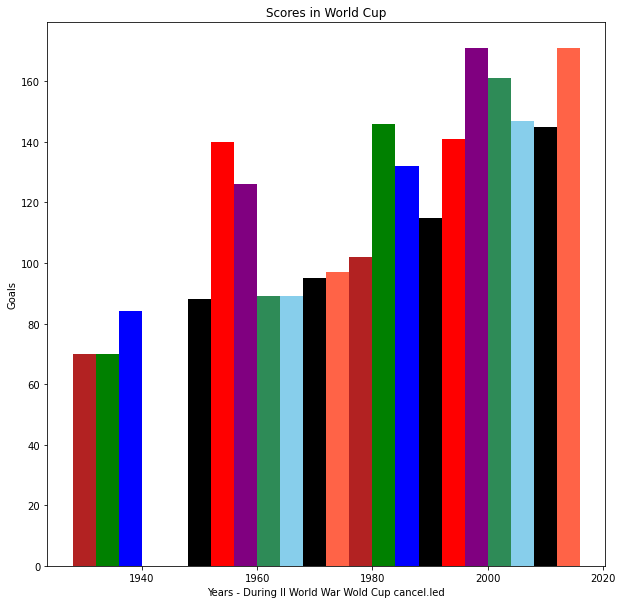

In [37]:
#2. World Cup - grafic sobre gols
fig = plt.figure(figsize=(10,10))

plt.bar(wcup_df['Year'], wcup_df['GoalsScored'], width = 4,
        color=['firebrick', 'green', 'blue', 'black', 'red', 'purple', 'seagreen', 'skyblue', 'black', 'tomato'])

plt.title('Scores in World Cup')
plt.xlabel("Years - During II World War Wold Cup cancel.led")
plt.ylabel('Goals')
plt.show()

In [11]:
#Test d'Hipotesi: Dividint la llista de World Cup en 2 meitats, contrastem totes dues parts.

In [43]:
#Exercici 2
#Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. 
#Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.
#p-valor: nivell de significació observat   
#alpha: nivell de significació d'error
from scipy import stats

alpha = 0.05

#Filtrem les dades del dataset en 2 blocs: escollim l'any 1974 com a divisor dels blocs.
goals_before_1974 = wcup_df['GoalsScored'].loc[wcup_df['Year'].isin([1930,1934,1938,1946,1950,1954,1958,1962,1966,1970,1974])]
goals_after_1974 = wcup_df['GoalsScored'].loc[wcup_df['Year'].isin([1978,1982,1986,1990,1994,1998,2002,2006,2010,2014])]

#Utilització de la funció estadistica ttest_ind.
#Calculant p-value.
tstatistic, pvalue = stats.ttest_ind(goals_before_1974, goals_after_1974)#, equal_var=False)

print('T-statistic:', tstatistic)
print('P-value:', round(pvalue, 10))

#P-value: 0.000133 té tendencia a valor 0 i és menor a 0.05. Es rebutja la hipòtesi nul·la.

if (pvalue < alpha):
    print('Es rebutja la hipòtesi nul·la')    
else:
      print('Hipòtesi nul·la acceptada') 

T-statistic: -4.832013758686618
P-value: 0.0001337258
Es rebutja la hipòtesi nul·la


In [19]:
#Nivell 3

In [261]:
wcup_df.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607


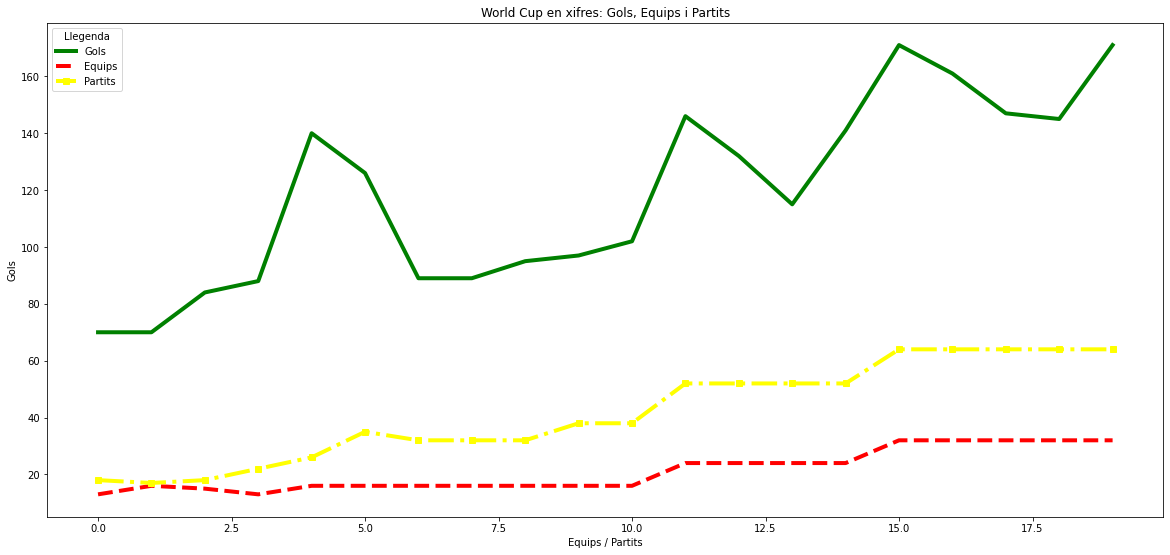

In [230]:
#3. World Cup - grafic sobre gols,equips i partits.
# 2D Plot of slice of 3D plot 
fig = plt.figure(figsize=(20,20))
plt.subplot(212)
plt.plot(wcup_df['GoalsScored'], color='green', label='Gols', linewidth=4)
plt.plot(wcup_df['QualifiedTeams'], color='red', label='Equips', linewidth=4, linestyle='dashed', animated=bool)
plt.plot(wcup_df['MatchesPlayed'], 'rs', color='yellow', label='Partits', linewidth=4, linestyle='dashdot',animated=bool)
plt.title('World Cup en xifres: Gols, Equips i Partits')
plt.xlabel("Equips / Partits")
plt.ylabel("Gols")
plt.legend(title="Llegenda")
plt.show()

In [243]:
#Test d'Hipotesi: Disposem la llista de World Cup en 4 parts que corresponen amb 4 continents (Africa, America, Asia i Europa).
#Calculem la relació entre Gols i Partits de cada campeonat. Comparem aquests valors entre continents.

In [279]:
#Exercici 3
#Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades.
#Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.
#p-valor: nivell de significació observat   
#alpha: nivell de significació d'error
import numpy as np
import scipy.stats as stats

#test ANOVA (ANalysis Of VAriance)
#test ANOVA s'utilitza per comparar més de 2 atributs

alpha = 0.05

#World Cup - campionats que es van celebrar a America: Uruguay, Brazil(2), Chile, Mexico(2), Argentina, USA.
#Obtenim la relació de gols anotats per partit - ho convertim a coma flotant.
america_g=(wcup_df['GoalsScored']/wcup_df['MatchesPlayed']).loc[wcup_df['Year'].isin([1930,1950,1962,1970,1978,1986,1994,2014])].values.astype(np.float64)

#World Cup - campionats que es van celebrar a Europa: Italy(2), France(2), Switzerland, Sweden, England, Germany(2), Spain.
#Obtenim la relació de gols anotats per partit - ho convertim a coma flotant.
europa_g=(wcup_df['GoalsScored']/wcup_df['MatchesPlayed']).loc[wcup_df['Year'].isin([1934,1938,1954,1958,1966,1974,1982,1990,1998,2006])].values.astype(np.float64)                
                 
#World Cup - campionats que es van celebrar a Africa: South Africa.
#Obtenim la relació de gols anotats per partit - ho convertim a coma flotant.
africa_g=(wcup_df['GoalsScored']/wcup_df['MatchesPlayed']).loc[wcup_df['Year'].isin([2010])].values.astype(np.float64)

#World Cup - campionats que es van celebrar a Asia: Korea/Japan.
#Obtenim la relació de gols anotats per partit - ho convertim a coma flotant.
asia_g=(wcup_df['GoalsScored']/wcup_df['MatchesPlayed']).loc[wcup_df['Year'].isin([2002])].values.astype(np.float64)

#Calcul de p-value:
tstatistic, pvalue = stats.f_oneway(africa_g, asia_g, america_g, europa_g)

print('T-statistic:', round(tstatistic,4))
print('P-value:', round(pvalue, 4))
#P-value: 0.6107 té tendencia a valor 0 i és menor a 0.05. Es rebutja la hipòtesi nul·la.

if (pvalue < alpha):
    print('Es rebutja la hipòtesi nul·la')    
else:
      print('Hipòtesi nul·la acceptada') 

T-statistic: 0.6224
P-value: 0.6107
Hipòtesi nul·la acceptada
